### **IMPORTANT**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


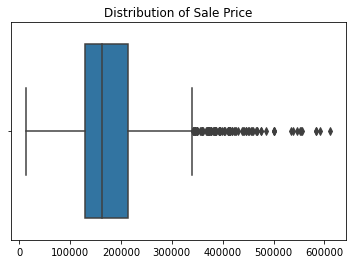

In [1]:
#first let's make sure we run the preceeding Part 1 notebook: EDA & Cleaning to continue where we left off:
%run 01_EDA_and_Cleaning.ipynb

# Preprocessing & Feature Engineering with Some EDA Cont...

### Intro

So now we've got clean data to work with, what should we do now? Now comes the artful steps of preprocessing and feature engineering. But what is feature engineering? As noted in our class lecture: "**Feature engineering** is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms." Essentially we are going to select (or often create) different variables that we think will be best applied in our machine learning process to achieve our goal. At this point it is always we should remind ourselves of where we are in the process of answering our problem statement. We can recall that the first required goal in providing insight is to determine potential sales price for our client list. So we know our target: sale price, also known as our 'y variable' as we will see in a little bit, but what about the x's? The x's are the variables that we think are the strongest contributors or influencers on our y, essentially the features that will drive the final sale price. 

When creating a linear or multilinear regression model it is important that we keep in mind the following 4/5 assumptions (4 for linear, 5 for multi): (source: class lecture 3.05)
1. **Linearity:**  𝑌  is linearly related to  𝑋𝑖  for all  𝑖 .
2. **Independence:** Each residual  𝜀𝑖  is independent of  𝜀𝑗  for all  𝑖≠𝑗 .
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of  𝑋𝑖 . (There should be no discernible relationship between  𝑋𝑖  and the residuals.)
5. **Independence Part II:**  𝑋𝑖  is independent of  𝑋𝑗  for all  𝑖≠𝑗 .

Performing tests to check for the above assumptions on our variables will be able to give us further insight to any adjustments to our variables that we might need to make in order to form a better model (squaring our feature or creating interaction terms etc..)

So should I just use all the features for my model? No. That creates problems both from a processing bandwitch (more features requires more run time) and you also run the risk of creating too much 'noise'. 'Noise' is data that is included but may have a very insignificant impact on the real life sale price and will do more harm than good during our machine learning process. Essentially our machine will expel unnecessary effort to account for these variables which don't accurately predict our sale price. 

So that makes sense, but how do determine which features to use? Do we just pluck them out of the air with intuition? While there's some truth in that, certainly not entirely the case. We want to make sure that we are informed when making decisions on our feature selection. I like to start with our correlation heatmap to see if there's anything that truly jumps out as a strong correlation

### 1. Correlations and Collinearity

Since we know we are most interested in our sale price, let's look at just seaborn heatmap correlation cut for just the 'SalePrice' variable:

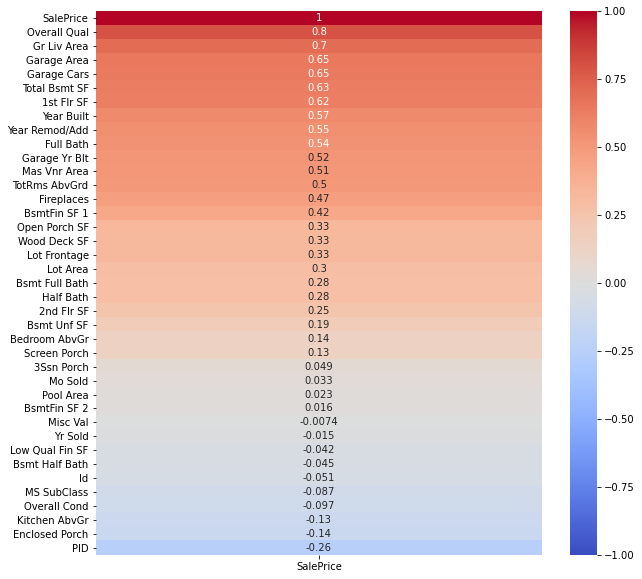

In [2]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

So what does this mean? Well let's start with what the numbers in each box means. The best summary I find of the heatmap interpretation comes from our good friend, stackoverflow: https://stats.stackexchange.com/questions/392517/how-can-one-interpret-a-heat-map-plot with the following: 
    
    "Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases."
    
From this we can know that the closer to 1 (as well -1, negative correlations are important too!), the variables have a much stronger linear correlation to sales price. So it would be a good idea to start there with our feature selection. It will be up to us to determine how many of these we will want to use, and how close to 1 (or -1) we deem worthy. From the above, we can see that all the blues are pretty light (i.e close to 1) so we know there's not real direct negative linear correlation, but we can see some of the top reds (positive correlation) are: 'Overall Qual', 'Gr Living Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add'. Does that make sense? Well let's think from a logical standpoint, Overall Quality (encompassing quality of the house) certainly seems to make sense with anything, better quality, higher price! Sq Ftage of living area? More space (so much extra space for activities), more money required to pay (higher sale price). So everything here seems to make sense. Although isn't 'Garage Area' and 'Garage Cars' essentially the same thing, just measured in different units? I would say most definitely--and if we remember from assumption 5, we want to design our model with Xi being independent of Xj in mind. Similar to above a heatmap correlation could help us visualize or we can also utilize pairplots:

Since we do not want to overrun our CPU let's first filter from the above heatmap all the elements that we think will be helpful based on our above interpretation. For now let's choose the above eight features that we noted from above:

In [3]:
selections = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 
            'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'SalePrice']

In [4]:
df = train[selections]
df.head()

Overall Qual  Gr Liv Area  Garage Area  Garage Cars  Total Bsmt SF  \
0             6         1479        475.0          2.0          725.0   
1             7         2122        559.0          2.0          913.0   
2             5         1057        246.0          1.0         1057.0   
3             5         1444        400.0          2.0          384.0   
4             6         1445        484.0          2.0          676.0   

   1st Flr SF  Year Built  Year Remod/Add  SalePrice  
0         725        1976            2005     130500  
1         913        1996            1997     220000  
2        1057        1953            2007     109000  
3         744        2006            2007     174000  
4         831        1900            1993     138500

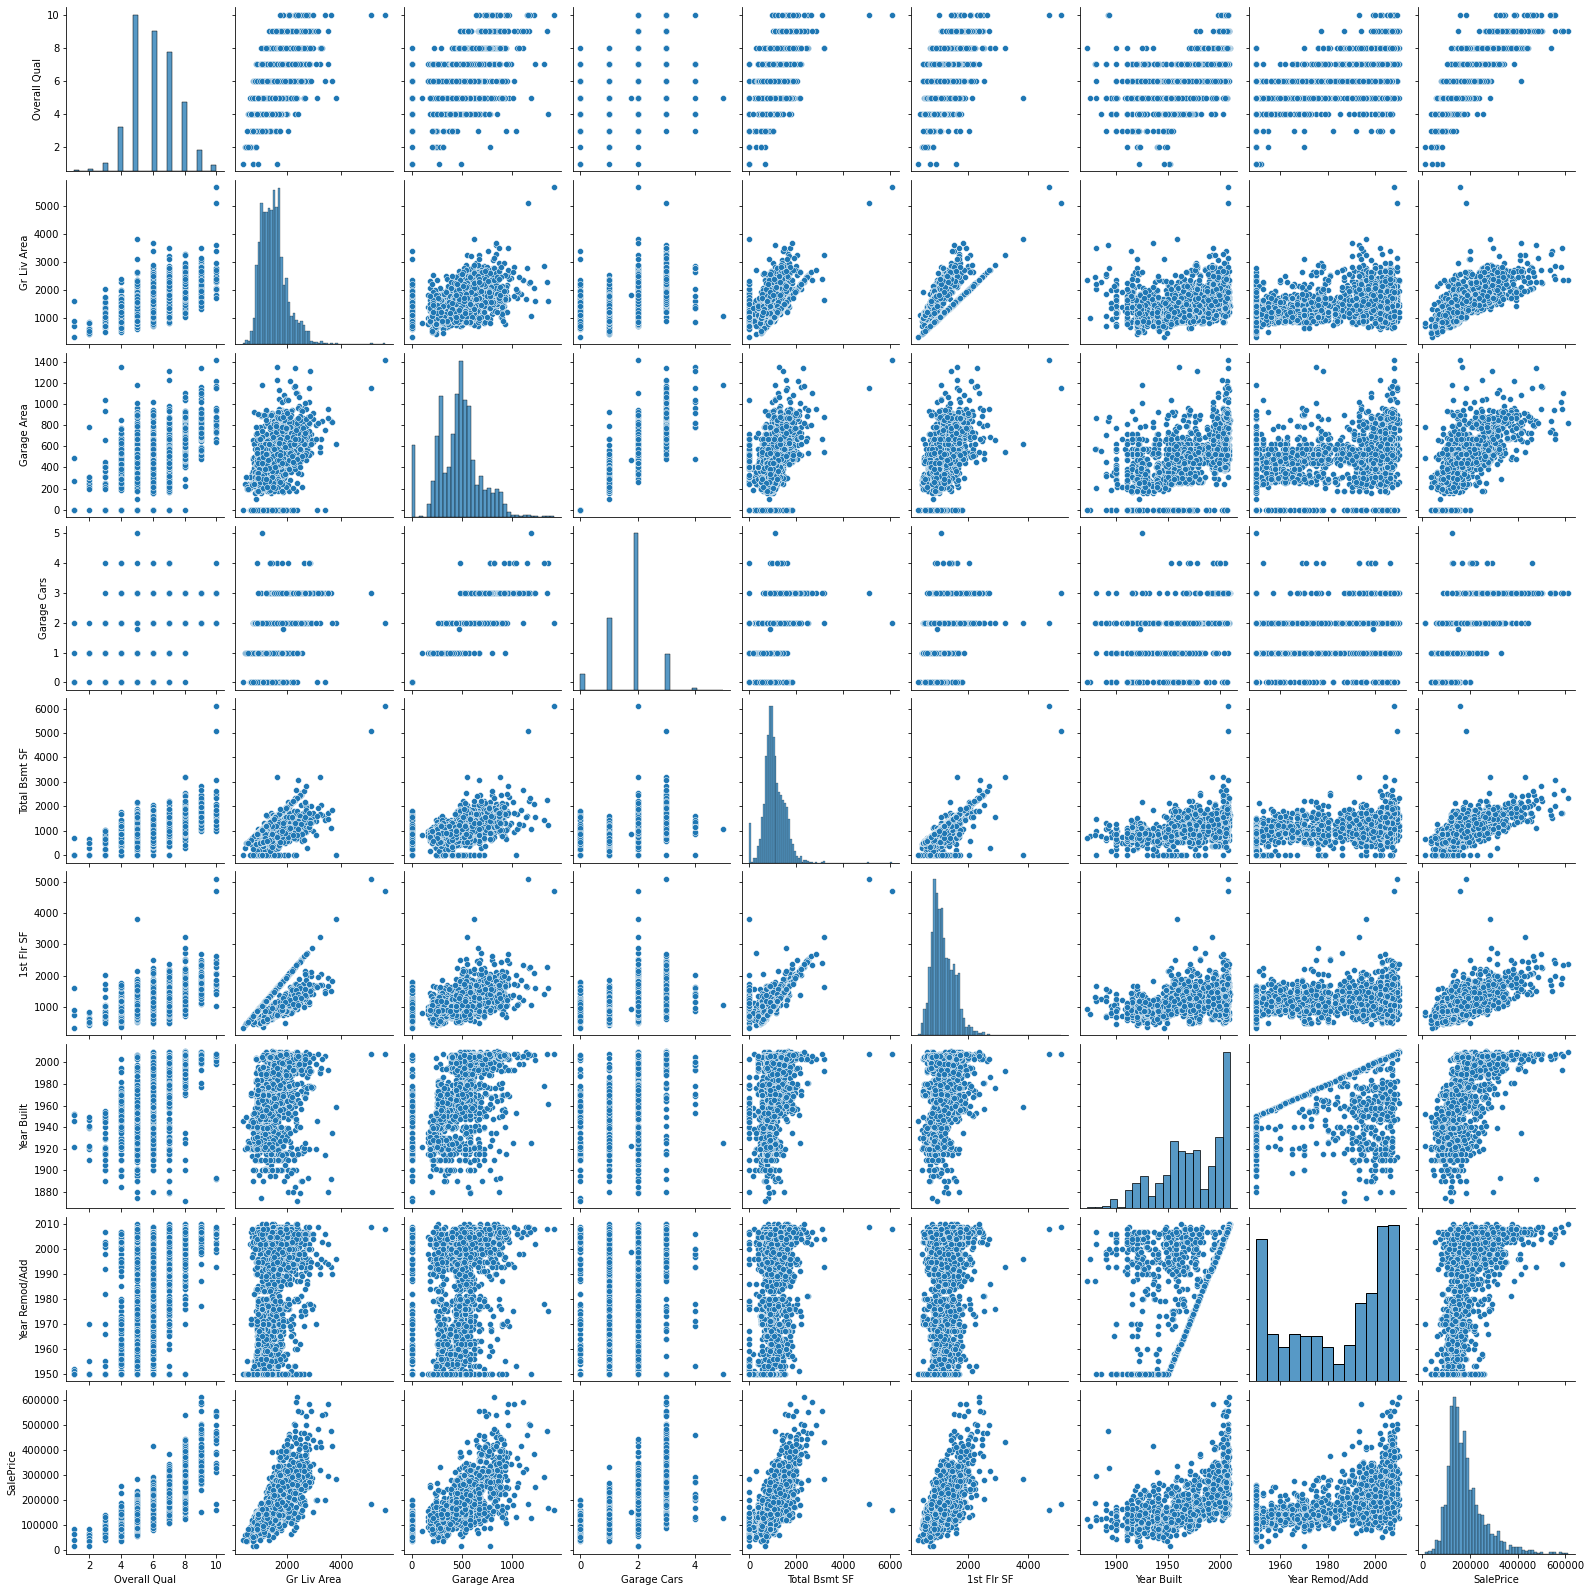

In [5]:
#now let's run the pairplot using Seaborn:
sns.pairplot(df);

What we want to be on the lookout here is for any sort of straight line (linear) trend on the plots. Anything exhibitng a trend of a straight line we know will have some degree of collinearity and we can deduce that we will probably one need one of the two variables for a cleaner model. From above it looks like 'Gr Liv Area' trends with '1st Flr SF', 'Garage Cars' to 'Garage Area', and then 'Year Built' to 'Year Remod/Add'. (Another note of pairplots is that the middle diagonal represents the histogram distribution of each variable). 

Does that make since intuitively? Would Gr Liv Area (above ground living area) increase if the 1st floor (typically above ground) increase? Absolutely! In fact in plenty of cases they are equal as there is only one floor, so in this case we know we can just go with the higher sales price correlated feature: 'Gr Liv Area' (which also happens to be our 2nd highest overall). 'Garage Cars' and 'Garage Area' is tied, let's select 'Garage Area' with the thinking that there is a more variant scale, allowing for a more elastic relationship to sale price. Lastly, for 'Year Built' and 'Year Remod/Add' we know that these also could be equal (no remodel = original built date), so let's go with the slighly higher correlation. 

Here's a closer look at the above selected comparisons:

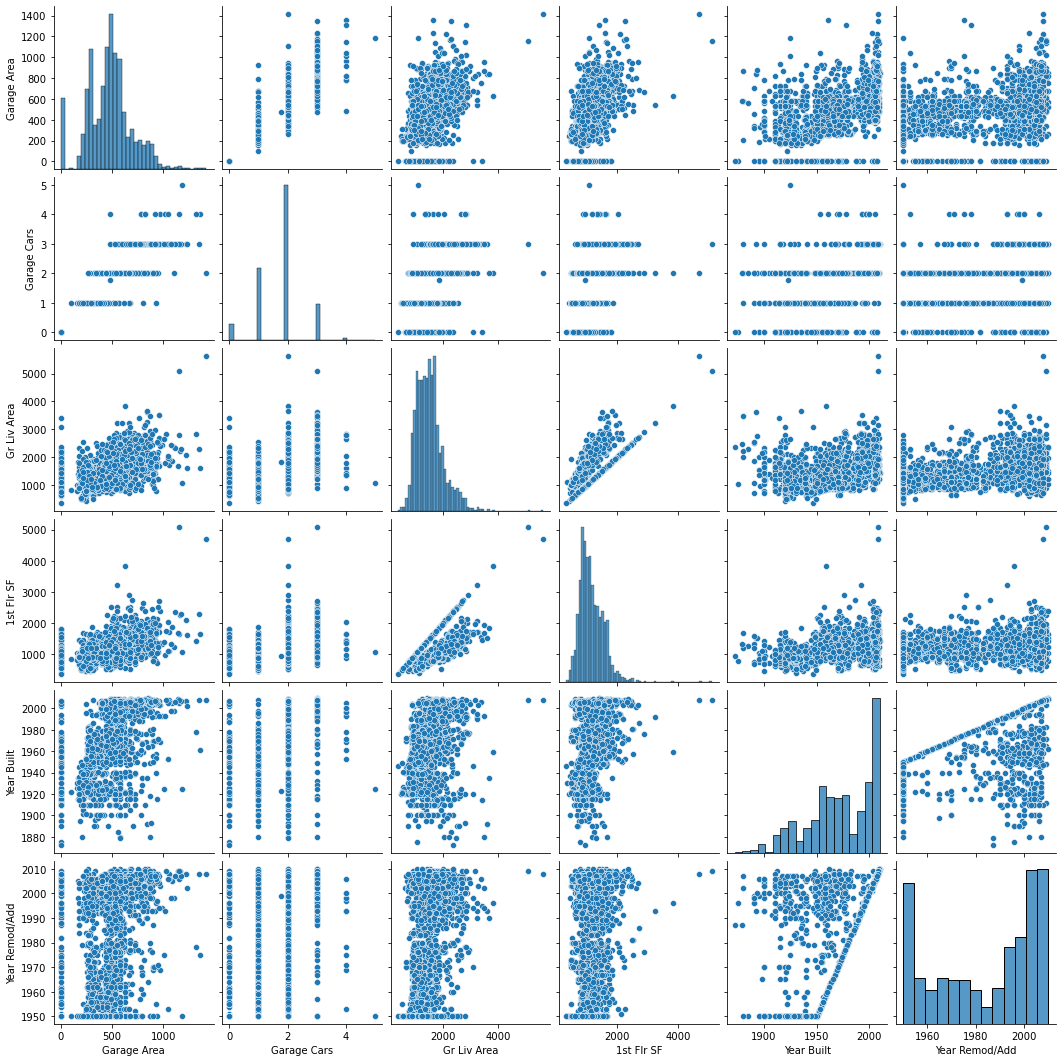

In [6]:
sns.pairplot(df, x_vars=['Garage Area', 'Garage Cars', 'Gr Liv Area', '1st Flr SF', 'Year Built', 'Year Remod/Add'], 
             y_vars=['Garage Area', 'Garage Cars', 'Gr Liv Area', '1st Flr SF', 'Year Built', 'Year Remod/Add'])

**Recap:** So we utilized both our correlation heatmap and pairplots to determine a starting point for features that might be good at creating an accurate price predicting model. So we are starting with:
    features =  ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built']

**IMPORTANT: Remember that the heatmap was only able to capture columns currently in numerical format. Categorical columns will have to be dummied and then evaluated. So these selected features are just a start and our variables will, and most likely always, need to be adjusted**

### 2. LINE Assumptions

We've removed instances of collinearity, but now let's examing our LINE assumptions from earlier on a per variable basis and see if there's any adjustments we might need to make. Let's put our 'Gr Liv Area' variable throught the LINE Assumption test. For this we will just have to treat 'Gr Liv Area' as our only x variable, while holding 'SalePrice' as our y still. (Instantiate with linear regression, we will get more into this later when fitting our model down the road).

In [7]:
X = df[['Gr Liv Area']]
y = df['SalePrice']
lr = LinearRegression()
lr.fit(X, y)
resids = y- lr.predict(X)

**L: Linearity**

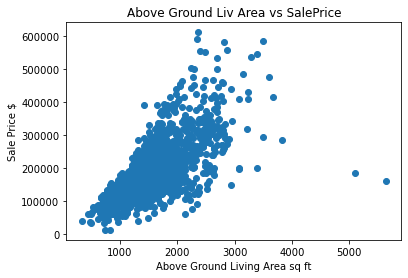

In [8]:
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.title('Above Ground Liv Area vs SalePrice')
plt.xlabel('Above Ground Living Area sq ft')
plt.ylabel('Sale Price $');

Looks pretty linear to me, x and y seem to upward trend at a relatively straight relationship.

**I: Independence** What we are looking for here is whether or not the variables are independent of one another? We can know from intuition tht the Living Area Sq Ftage existed well before the agreed upon sale price, so it's safe to say they are independent 

**N: Normality**

Here we are looking for normality of residuals, so can utilize histogram to view this:

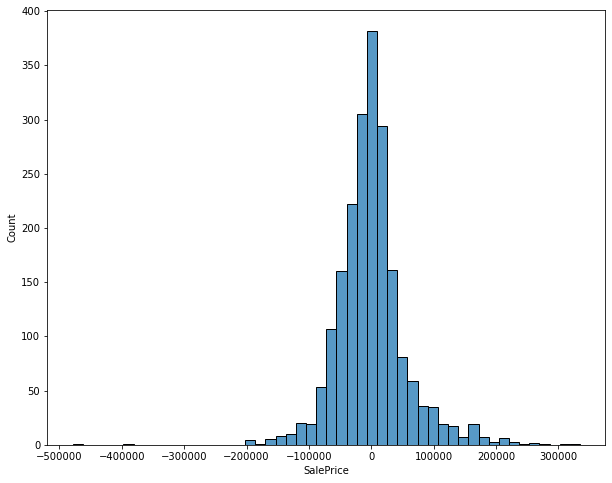

In [9]:
plt.figure(figsize = (10, 8))
sns.histplot(resids, bins = 50);

Wow! One of the more tightly, normally distributed histograms I've seen in a while! Definitely passes this test!

**E: Equal Variance**

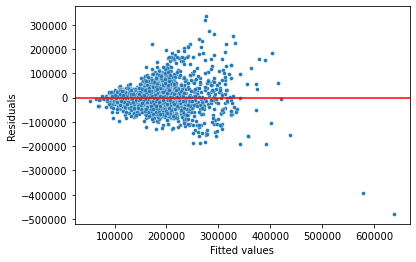

In [10]:
resids = y - lr.predict(X)
sns.scatterplot(x = lr.predict(X), y = resids, s = 15)
plt.axhline(0, color = 'r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

Variance is okay in this case. The plots are fairly clumped up and seem to spray equally random as they move along the x-axis, but is sufficient to say that our feature 'Gr Liv Area' has met the 4 LINE assumptions and displays a linear relationship to our y-variable: SalePrice. Although the variance chart may be an indication that we may want to perform some additional feature engineering by introducing **interaction terms** to our model..

### 3. Interaction Terms: PolynomialFeatures

Before getting into a bit more depth of interaction terms, from the above E part of our LINE assumptions, I mentioned that a pattern would be bad. Often times we will see patterns such as a possible curved parabolic shape on our scatterplot, this would be an indication that we would would want to square our x variable to remedy the situation. Introducing that new x variable squared is the first example of an interaction term. But what if we had multilinear regression and had multiple values, and wanted to create a variable that is elastic on both two x variables at the same time? Ex from our class lecture: 
    
    "Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

    Interaction terms allow us to see what affect the combination of two features have on our label. For example, I'm not a fan of plain hot dogs, and I never eat mustard by itself. But I do enjoy hot dogs with mustard."
    
So interaction terms are pretty much what they sound like, a newly introduced variable to our features that creates an interaction either with itself (squared) or with another feature (multiplied). What if we have a ton of variables, do we have to do it manually ourselves? Of course not! That's where sklearn's preprocessing tool 'PolynomialFeatures' comes in handy! As we will see below we will fit and transform our sets to create new interaction features for our model. 

First let's set up our X's (equal to the features we have selected up to this point), and our y variable, our target (SalePrice)

In [11]:
features =  ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built']
X_big_train = train[features]
y_train = train['SalePrice']

X_big_test = test[features]

**Note:** Since we will also want to train-test split our initial "train" set to fit and test our model first before applying to unseen data, let's use X_big_train initially so we don't muddy up our variable names down the road.

In [12]:
#First step is to instantiate
poly = PolynomialFeatures(include_bias=False)

In [13]:
#Next we will want to fit our polyfeatures to our big train
poly.fit(X_big_train, y_train) #y is optional here

PolynomialFeatures(include_bias=False)

In [14]:
#Next we will transform both our X's for our train and test because remember in this siutation we'll have to mirror 
#what we do to train on test since they are already split, otherwise we won't be able to map our model properly on the
#unseen data
X_poly_train = poly.transform(X_big_train)
X_poly_test = poly.transform(X_big_test)

In [15]:
#Let's view this in a DataFrame to make sure it worked properly:
df_poly_train=pd.DataFrame(X_poly_train, columns=poly.get_feature_names(features))
df_poly_train

Overall Qual  Gr Liv Area  Garage Area  Total Bsmt SF  Year Built  \
0              6.0       1479.0        475.0          725.0      1976.0   
1              7.0       2122.0        559.0          913.0      1996.0   
2              5.0       1057.0        246.0         1057.0      1953.0   
3              5.0       1444.0        400.0          384.0      2006.0   
4              6.0       1445.0        484.0          676.0      1900.0   
...            ...          ...          ...            ...         ...   
2046           8.0       1728.0        520.0         1884.0      2007.0   
2047           4.0        861.0        539.0          861.0      1940.0   
2048           6.0       1913.0        342.0          896.0      1928.0   
2049           4.0       1200.0        294.0         1200.0      1956.0   
2050           7.0       1804.0        442.0          994.0      1999.0   

      Overall Qual^2  Overall Qual Gr Liv Area  Overall Qual Garage Area  \
0               36.0                    8874.0                    2850.0   
1               49.0                   14854.0                    3913.0   
2               25.0                    5285.0                    1230.0   
3               25.0                    7220.0                    2000.0   
4               36.0                    8670.0                    2904.0   
...              ...                       ...                       ...   
2046            64.0                   13824.0                    4160.0   
2047            16.0                    3444.0                    2156.0   
2048            36.0                   11478.0                    2052.0   
2049            16.0                    4800.0                    1176.0   
2050            49.0                   12628.0                    3094.0   

      Overall Qual Total Bsmt SF  Overall Qual Year Built  Gr Liv Area^2  \
0                         4350.0                  11856.0      2187441.0   
1                         6391.0                  13972.0      4502884.0   
2                         5285.0                   9765.0      1117249.0   
3                         1920.0                  10030.0      2085136.0   
4                         4056.0                  11400.0      2088025.0   
...                          ...                      ...            ...   
2046                     15072.0                  16056.0      2985984.0   
2047                      3444.0                   7760.0       741321.0   
2048                      5376.0                  11568.0      3659569.0   
2049                      4800.0                   7824.0      1440000.0   
2050                      6958.0                  13993.0      3254416.0   

      Gr Liv Area Garage Area  Gr Liv Area Total Bsmt SF  \
0                    702525.0                  1072275.0   
1                   1186198.0                  1937386.0   
2                    260022.0                  1117249.0   
3                    577600.0                   554496.0   
4                    699380.0                   976820.0   
...                       ...                        ...   
2046                 898560.0                  3255552.0   
2047                 464079.0                   741321.0   
2048                 654246.0                  1714048.0   
2049                 352800.0                  1440000.0   
2050                 797368.0                  1793176.0   

      Gr Liv Area Year Built  Garage Area^2  Garage Area Total Bsmt SF  \
0                  2922504.0       225625.0                   344375.0   
1                  4235512.0       312481.0                   510367.0   
2                  2064321.0        60516.0                   260022.0   
3                  2896664.0       160000.0                   153600.0   
4                  2745500.0       234256.0                   327184.0   
...                      ...            ...                        ...   
2046               3468096.0       27040

In [16]:
print(pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features)).shape)
df_poly_test=pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features))
df_poly_test

(878, 20)


Overall Qual  Gr Liv Area  Garage Area  Total Bsmt SF  Year Built  \
0             6.0       1928.0        440.0         1020.0      1910.0   
1             5.0       1967.0        580.0         1967.0      1977.0   
2             7.0       1496.0        426.0          654.0      2006.0   
3             5.0        968.0        480.0          968.0      1923.0   
4             6.0       1394.0        514.0         1394.0      1963.0   
5             4.0       1092.0        286.0          546.0      1972.0   
6             4.0       1093.0        308.0          869.0      1958.0   
7             5.0       1268.0        252.0         1268.0      1977.0   
8             7.0       1680.0        588.0          840.0      2004.0   
9             6.0       1279.0        473.0         1196.0      1977.0   
10            6.0       1217.0        484.0         1217.0      1991.0   
11            6.0       1040.0        320.0         1040.0      1925.0   
12            6.0       1375.0        451.0         1367.0      1954.0   
13            7.0       2787.0        820.0         1168.0      2000.0   
14            6.0       1827.0        240.0          848.0      1924.0   
15            5.0       1340.0        252.0            0.0      1957.0   
16            6.0       1436.0        828.0          884.0      1940.0   
17            5.0       1073.0        340.0         1073.0      1956.0   
18            6.0       1773.0        418.0         1313.0      1961.0   
19            8.0       1742.0        424.0          916.0      1882.0   
20            5.0       1060.0        270.0         1060.0      1968.0   
21            5.0        864.0        732.0          864.0      1961.0   
22            6.0       1617.0        533.0         1604.0      1993.0   
23            6.0        988.0        540.0          938.0      1969.0   
24            7.0       1218.0        576.0         1218.0      2007.0   
25            5.0        864.0        352.0          864.0      1972.0   
26            4.0       1738.0        368.0          715.0      1920.0   
27            5.0       1750.0        240.0          636.0      1880.0   
28            6.0       1054.0        480.0          936.0      1963.0   
29            3.0        670.0          0.0          370.0      1945.0   
30            4.0        858.0        684.0          858.0      1971.0   
31            4.0       1208.0        539.0          780.0      1925.0   
32            7.0       2640.0        864.0         1240.0      1880.0   
33            5.0       1178.0        439.0         1176.0      1973.0   
34            7.0       1492.0        608.0         1492.0      2001.0   
35            7.0       1458.0        454.0          608.0      2006.0   
36            4.0       1657.0        162.0         1147.0      1920.0   
37            4.0        998.0        460.0            0.0      1945.0   
38            5.0        910.0        414.0          105.0      1953.0   
39            7.0       1358.0        625.0         1339.0      1999.0   
40            6.0       1224.0        528.0          612.0      2009.0   
41            7.0       1886.0        431.0          930.0      1998.0   
42            5.0       1327.0        624.0         1063.0      1959.0   
43            5.0       1363.0        288.0         1008.0      1951.0   
44            7.0       1501.0        512.0         1501.0      1987.0   
45            4.0       1344.0          0.0          546.0      1970.0   
46            7.0       1786.0        608.0          920.0      2001.0   
47            5.0        965.0        300.0          828.0      1965.0   
48            5.0        936.0        308.0          936.0      1956.0   
49            5.0       1040.0        308.0         1040.0      1963.0   
50            5.0       1248.0        160.0          912.0      1930.0   
51            8.0       2268.0        624.0          346.0      1890.0   
52            8.0       1615.0        864.0         1615.0      2007.0   
53       

Great! Looks like we have succesffully created and introduced the interaction terms that we were hoping for. During our model analysis we may find it necessary to remove some unwanted columns, but we can save that for later in the project during our model tweaking section. 

Brainblast: But what about those categorical columns? I seem to recall real estate specialists saying: "The three most important factors in real estate are: 'location, location, location'" Surely there must be a way to incorporate these variables into our model? You bet there is! That's where one one hot encoding (or dummy variables) comes into play! 

### 4. One-Hot Encoding Dummy Variables

The practice behind one-hot encoding is taking a single categorical column and creating new columns for each possible 'value' within the category. Ex from lectures: Seasons can be either Spring, Summer, Fall, or Winter. One hot encoding would turn this one column into 4 columns one for Spring, one for Summer, one for Fall, and one for Winter. And the way we will know which season corresponds for the row data is it will show a 1 within the correct column and 0 for the absent categories. It's important to note that it is best practice to drop the first column of the newly created dummy variables as it will essentially be redundant (i.e. if we see all 0's for Spring, Summer, and Fall for our rows we know the only possibility would be Winter) 

I have elected to do this stage after the polyfeatures step to reduce the number of cluttered column that may collect too much noise for our model. The easiest way to obtain dummy variables is to utilize the pd.get_dummies(). So let's use our outside knowledge of 'location, location, location' and incorprate a location based categorical column: 'Neighborhood' and create dummy columns and add it to our features list. This is especially important with our specific project goal in mind of assisting Rise Realty with insight on the most profitable neighborhoods

In [17]:
#Remember we will have to perform this for both train and test:
X_train_dum = pd.get_dummies(train, columns=['Neighborhood'], drop_first=True)
X_test_dum = pd.get_dummies(test, columns=['Neighborhood'], drop_first=True)

In [18]:
#let's check it out to see if it ran correctly:
X_train_dum

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL       69.0552     13517   Pave   
1      544  531379050           60        RL       43.0000     11492   Pave   
2      153  535304180           20        RL       68.0000      7922   Pave   
3      318  916386060           60        RL       73.0000      9802   Pave   
4      255  906425045           50        RL       82.0000     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL       79.0000     11449   Pave   
2047   785  905377130           30        RL       69.0552     12342   Pave   
2048   916  909253010           50        RL       57.0000      7558   Pave   
2049   639  535179160           20        RL       80.0000     10400   Pave   
2050    10  527162130           60        RL       60.0000      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope Condition 1  \
0     None       IR1          Lvl    AllPub    CulDSac        Gtl        RRAe   
1     None       IR1          Lvl    AllPub    CulDSac        Gtl        Norm   
2     None       Reg          Lvl    AllPub     Inside        Gtl        Norm   
3     None       Reg          Lvl    AllPub     Inside        Gtl        Norm   
4     None       IR1          Lvl    AllPub     Inside        Gtl        Norm   
...    ...       ...          ...       ...        ...        ...         ...   
2046  None       IR1          HLS    AllPub     Inside        Gtl        Norm   
2047  None       IR1          Lvl    AllPub     Inside        Gtl        Norm   
2048  None       Reg          Bnk    AllPub     Inside        Gtl        Norm   
2049  None       Reg          Lvl    AllPub     Corner        Gtl        Norm   
2050  None       Reg          Lvl    AllPub     Inside        Gtl        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0           Norm      1Fam      2Story             6             8   
1           Norm      1Fam      2Story             7             5   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
2046        Norm      1Fam      1Story             8             5   
2047        Norm      1Fam      1Story             4             5   
2048        Norm      1Fam      1.5Fin             6             6   
2049        Norm      1Fam      1Story             4             5   
2050        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
0           1976            2005      Gable   CompShg      HdBoard   
1           1996            1997      Gable   CompShg      VinylSd   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
2046        2007            2007      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   
2048        1928            1950      Gable   CompShg      BrkFace   
2049        1956            1956      Gable   CompShg      Plywood   
2050        1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
1         VinylSd      BrkFace         132.0         Gd         TA      PConc   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   

Scrolling over we can see that we successfully implemented the dummy variables into our initial models. But how do we incorporate these into columns into our poly features? Let's utilize our .drop and pd.concat methods

In [19]:
#first let's get all our dummies and filter them out from our train and test dummy sets:
dummies = ['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide','Neighborhood_ClearCr',
           'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert',
           'Neighborhood_Greens','Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
           'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
           'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
           'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
           'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']
           

In [20]:
df_train_dummy=X_train_dum[dummies]
df_train_dummy

Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
2046                     0                    0                     0   
2047                     0                    0                     0   
2048                     0                    0                     0   
2049                     0                    0                     0   
2050                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2046                     0                     0                     0   
2047                     0                     0                     0   
2048                     0                     0                     1   
2049                     0                     0                     0   
2050                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
2046                     0                     0                    0   
2047                     1                     0                    0   
2048                     0                     0                    0   
2049                     0                     0                    0   
2050                     0                     1                    0   

      Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
2046                     0                    0                     0   
2047                     0                    0                     0   
2048                     0                    0                     0   
2049                     0                    0                     0   
2050                     0                    0                     0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   1   
3                        0                     0                   0   
4                        0                     0                   0   
...                    ...                   ...      

It's important to note that we will want the same dummy columns created on the test set as well, but if the test set doesn't have a data entry for one the columns, it won't be created and we'll have to manually create it ourselves. In this case when we tried to test[dummies] it responded with an error: "['Neighborhood_GrnHill', 'Neighborhood_Landmrk'] not in index" So we will have to add this column to X_test_dum df first, fill with 0's (since 0 would indicate no presence). 

In [21]:
X_test_dum['Neighborhood_GrnHill'] = 0
X_test_dum['Neighborhood_Landmrk'] = 0

In [22]:
X_test_dum[dummies].head()

Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     1                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   1   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     1                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     1                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    1                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  
0                     0                    0                     0  
1                     0                    0                     0  
2                     0                    0                     0  
3                     0                    0                     0  
4                     0                    0                     0

In [23]:
df_test_dummy = X_test_dum[dummies]

Looks good, now let's set these as temporary values for all of dataframes and concat to create our initial "final" dataframe and then call the columns from that and set for our new X's

In [24]:
df_train_concat = pd.concat([df_poly_train, df_train_dummy], axis = 1)
df_train_concat

Overall Qual  Gr Liv Area  Garage Area  Total Bsmt SF  Year Built  \
0              6.0       1479.0        475.0          725.0      1976.0   
1              7.0       2122.0        559.0          913.0      1996.0   
2              5.0       1057.0        246.0         1057.0      1953.0   
3              5.0       1444.0        400.0          384.0      2006.0   
4              6.0       1445.0        484.0          676.0      1900.0   
...            ...          ...          ...            ...         ...   
2046           8.0       1728.0        520.0         1884.0      2007.0   
2047           4.0        861.0        539.0          861.0      1940.0   
2048           6.0       1913.0        342.0          896.0      1928.0   
2049           4.0       1200.0        294.0         1200.0      1956.0   
2050           7.0       1804.0        442.0          994.0      1999.0   

      Overall Qual^2  Overall Qual Gr Liv Area  Overall Qual Garage Area  \
0               36.0                    8874.0                    2850.0   
1               49.0                   14854.0                    3913.0   
2               25.0                    5285.0                    1230.0   
3               25.0                    7220.0                    2000.0   
4               36.0                    8670.0                    2904.0   
...              ...                       ...                       ...   
2046            64.0                   13824.0                    4160.0   
2047            16.0                    3444.0                    2156.0   
2048            36.0                   11478.0                    2052.0   
2049            16.0                    4800.0                    1176.0   
2050            49.0                   12628.0                    3094.0   

      Overall Qual Total Bsmt SF  Overall Qual Year Built  Gr Liv Area^2  \
0                         4350.0                  11856.0      2187441.0   
1                         6391.0                  13972.0      4502884.0   
2                         5285.0                   9765.0      1117249.0   
3                         1920.0                  10030.0      2085136.0   
4                         4056.0                  11400.0      2088025.0   
...                          ...                      ...            ...   
2046                     15072.0                  16056.0      2985984.0   
2047                      3444.0                   7760.0       741321.0   
2048                      5376.0                  11568.0      3659569.0   
2049                      4800.0                   7824.0      1440000.0   
2050                      6958.0                  13993.0      3254416.0   

      Gr Liv Area Garage Area  Gr Liv Area Total Bsmt SF  \
0                    702525.0                  1072275.0   
1                   1186198.0                  1937386.0   
2                    260022.0                  1117249.0   
3                    577600.0                   554496.0   
4                    699380.0                   976820.0   
...                       ...                        ...   
2046                 898560.0                  3255552.0   
2047                 464079.0                   741321.0   
2048                 654246.0                  1714048.0   
2049                 352800.0                  1440000.0   
2050                 797368.0                  1793176.0   

      Gr Liv Area Year Built  Garage Area^2  Garage Area Total Bsmt SF  \
0                  2922504.0       225625.0                   344375.0   
1                  4235512.0       312481.0                   510367.0   
2                  2064321.0        60516.0                   260022.0   
3                  2896664.0       160000.0                   153600.0   
4                  2745500.0       234256.0                   327184.0   
...                      ...            ...                        ...   
2046               3468096.0       27040

Did it work? Well let's examine our original train database and utilize our data dictionary to make sure we've represented our data accurately. According to the above our first entry in our original train should be Sawyer Neighborhood and the second should be Sawyer West

In [25]:
train['Neighborhood'].head(2)

0     Sawyer
1    SawyerW
Name: Neighborhood, dtype: object

Great, now let's do the same concat method for our test set to allow us to eventually properly apply our created model to the test set down the road

In [26]:
df_test_concat = pd.concat([df_poly_test, df_test_dummy], axis = 1)
print(df_test_concat.shape)
df_test_concat

(878, 47)


Overall Qual  Gr Liv Area  Garage Area  Total Bsmt SF  Year Built  \
0             6.0       1928.0        440.0         1020.0      1910.0   
1             5.0       1967.0        580.0         1967.0      1977.0   
2             7.0       1496.0        426.0          654.0      2006.0   
3             5.0        968.0        480.0          968.0      1923.0   
4             6.0       1394.0        514.0         1394.0      1963.0   
5             4.0       1092.0        286.0          546.0      1972.0   
6             4.0       1093.0        308.0          869.0      1958.0   
7             5.0       1268.0        252.0         1268.0      1977.0   
8             7.0       1680.0        588.0          840.0      2004.0   
9             6.0       1279.0        473.0         1196.0      1977.0   
10            6.0       1217.0        484.0         1217.0      1991.0   
11            6.0       1040.0        320.0         1040.0      1925.0   
12            6.0       1375.0        451.0         1367.0      1954.0   
13            7.0       2787.0        820.0         1168.0      2000.0   
14            6.0       1827.0        240.0          848.0      1924.0   
15            5.0       1340.0        252.0            0.0      1957.0   
16            6.0       1436.0        828.0          884.0      1940.0   
17            5.0       1073.0        340.0         1073.0      1956.0   
18            6.0       1773.0        418.0         1313.0      1961.0   
19            8.0       1742.0        424.0          916.0      1882.0   
20            5.0       1060.0        270.0         1060.0      1968.0   
21            5.0        864.0        732.0          864.0      1961.0   
22            6.0       1617.0        533.0         1604.0      1993.0   
23            6.0        988.0        540.0          938.0      1969.0   
24            7.0       1218.0        576.0         1218.0      2007.0   
25            5.0        864.0        352.0          864.0      1972.0   
26            4.0       1738.0        368.0          715.0      1920.0   
27            5.0       1750.0        240.0          636.0      1880.0   
28            6.0       1054.0        480.0          936.0      1963.0   
29            3.0        670.0          0.0          370.0      1945.0   
30            4.0        858.0        684.0          858.0      1971.0   
31            4.0       1208.0        539.0          780.0      1925.0   
32            7.0       2640.0        864.0         1240.0      1880.0   
33            5.0       1178.0        439.0         1176.0      1973.0   
34            7.0       1492.0        608.0         1492.0      2001.0   
35            7.0       1458.0        454.0          608.0      2006.0   
36            4.0       1657.0        162.0         1147.0      1920.0   
37            4.0        998.0        460.0            0.0      1945.0   
38            5.0        910.0        414.0          105.0      1953.0   
39            7.0       1358.0        625.0         1339.0      1999.0   
40            6.0       1224.0        528.0          612.0      2009.0   
41            7.0       1886.0        431.0          930.0      1998.0   
42            5.0       1327.0        624.0         1063.0      1959.0   
43            5.0       1363.0        288.0         1008.0      1951.0   
44            7.0       1501.0        512.0         1501.0      1987.0   
45            4.0       1344.0          0.0          546.0      1970.0   
46            7.0       1786.0        608.0          920.0      2001.0   
47            5.0        965.0        300.0          828.0      1965.0   
48            5.0        936.0        308.0          936.0      1956.0   
49            5.0       1040.0        308.0         1040.0      1963.0   
50            5.0       1248.0        160.0          912.0      1930.0   
51            8.0       2268.0        624.0          346.0      1890.0   
52            8.0       1615.0        864.0         1615.0      2007.0   
53       

**Recap:** So now we're created both interaction terms from our intially selected features we determined that are worth investigating via the seaborn heatmap, and then created dummy variables using our outside knowledge to incorporate our Neighborhood feature, and combined them into respective dataframes where the columns represent all of our intended features. Now we will be able to redefine our X's and start creating and testing our model. First step in testing our model will require us to further split our train set into a train-test split. This will allow us to fit our model to the subsetted train (train within the train) and then test it on our test subset (test within the big train), and evaluate if it makes sense to then apply to our test set and determine the effectiveness of price prediction. 

### 5. All Aboard the Train/Test Data!

As mentioned in above recap, we can't simply apply our model to the overall train (Ames data in our project case) and then test it on our test (client data), because as we know there will be no y_test to compare it since our client set does not provide the target column of sale price. So should we just blindly fit and hope for the best? No. That would be silly and detrimental to maintaining the faith of our client! Let's train/test split our train (Ames) data since the price is known throughout and perform our testing methods on that data set to see if we can conclude that it will be sensible to apply to our unknown client data set.

First, before train/split let's make sure to set up our new X (and y to be safe). At this stage we will want to use all the features that we have now either selected or created (interaction terms & dummy columns)

In [27]:
model_feats = df_train_concat.columns

In [28]:
X = df_train_concat[model_feats]
y = train['SalePrice']

#Also set up our big test X for testing model later
X_big_test = df_test_concat[model_feats]

Now let's create the train/test split using the X and y above. This will split our data (Big Train) into two separate train and test sets that both have our target, so we will be able to fit on our sub train then test on sub train and then decide on an effective model and appropriate features. Once satisfied we will be able to apply this model onto the Big Test data and create predictions for our Sale Price (our ultimate goal). Setting test_size to .25 will create a 75/25 split for our data by train/test respectively. Setting a random_state will allow us to revisit the split and achieve the same numbers with future uses. 

In [29]:
#train/test split code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,
                                                   random_state = 42)

In [30]:
#Let's print our shapes for Train/Test and check to see if test is correct:
print(X_train.shape)
print(X_test.shape)

(1538, 47)
(513, 47)


In [31]:
#Do the same for our y's:
print(y_train.shape)
print(y_test.shape)

(1538,)
(513,)


Looks good, we have successfully split our data, and are almost ready to begin fitting our model and evaluating it. But firstly there is an inherrent problem with the data that we are using. The problem is that we are comparing mulitiple features all on different scales/units. This will pose an issue why evaluating our model that is sensitive to magnitudes, so we must find a way to "scale" or create a uniform unit across each element. The best way to do this is with the StandardScalar preprocessing feature from sklearn (seen in workbook 1 library imports).

### 6. Scaling with StandardScalar

As we alluded to above, the goal of standard scalar is to convert each column into something with equal units. This method utilizies converting our columns into their appropriate z scores (${x- \mu \over \sigma}$) Now our data units will be in standard deviations away from the mean. So in order to do this we must instantiate StandardScalar, then allow it fit to our X trains and X tests in order to learn their means and std deviations.

In [32]:
#instantiate StandardScalar:
ss = StandardScaler()

In [33]:
#fit it to our X_train
ss.fit(X_train)

StandardScaler()

In [34]:
#now transform our X_train and X_test and save them as Z_train and Z_test 
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

Now our train/test data should be appropriately scaled and we should be able to begin effectively fitting our models to our train set and then testing them on our test set. Please refer to notebook 03_Model_Tuning.ipynb where we will begin by testing our initial starting features then make adjustments based on our evaluations